In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy

In [2]:
nc_wind_orig = xr.open_dataset(
    '/public/home/gaoguandong/xrsh/work/INPDIR/cockburn_wind_cfsr_2016-2018.nc',
use_cftime=False)

In [29]:
t_beg = np.where(nc_wind_orig.time.data == 
                 np.datetime64('2017-02-13T00:00:00.000000000'))[0][0]

inpdir = '/public/home/gaoguandong/xrsh/work/INPDIR/'

In [31]:
t_beg

1636

In [41]:
for i in range(4):
    #del data
    
    nc_change = deepcopy(nc_wind_orig)
    weeknum = i+6
    data = nc_change.U10.data
    #data[t_beg:,:,:]=0.9 * nc_change.U10.data[t_beg:,:,:]
    data[t_beg:,:,:]=0.9 * deepcopy(nc_wind_orig.U10.data[t_beg:,:,:])
    nc_change['U10'] = (('Time', 'south_north', 'west_east'),data)
    del data
    data = nc_change.V10.data
    data[t_beg:,:,:]=0.9 * deepcopy(nc_wind_orig.V10.data[t_beg:,:,:])
    nc_change['V10'] = (('Time', 'south_north', 'west_east'),data)
    del data
    nc_change.to_netcdf(inpdir+'cockburn_wind_'+str(weeknum)+'_wind90.nc',
                          format = 'NETCDF3_64BIT')
    print(inpdir+'cockburn_wind_'+str(weeknum)+'_wind90.nc')
    del nc_change
    t_beg += 7*24

/public/home/gaoguandong/xrsh/work/INPDIR/cockburn_wind_6_wind90.nc
/public/home/gaoguandong/xrsh/work/INPDIR/cockburn_wind_7_wind90.nc
/public/home/gaoguandong/xrsh/work/INPDIR/cockburn_wind_8_wind90.nc
/public/home/gaoguandong/xrsh/work/INPDIR/cockburn_wind_9_wind90.nc


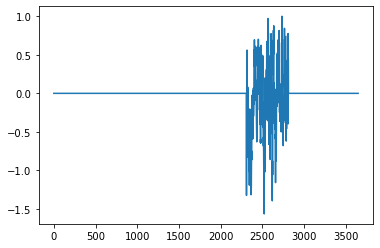

In [47]:
nc_tmp = xr.open_dataset(inpdir+'cockburn_wind_'+str(9)+'_wind90.nc',
                         use_cftime=False)
nc_tmp2 = xr.open_dataset(inpdir+'cockburn_wind_'+str(6)+'_wind90.nc',
                         use_cftime=False)
plt.plot(nc_tmp2.U10[:,10,12]-nc_tmp.U10[:,10,12])
#plt.plot(nc_tmp.U10[t_beg:,10,12])
